In [1]:
# Carichiamo i dati relativi a facebook news
root='/kaggle/working/'
import sys
module_path = root+'thesis/src/EDA'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
!pip install fastparquet
!pip install gdown
import gdown
url='https://drive.google.com/uc?id=1Y2lGWkcgo_IWHdWFh_Qcn0K74D_xQhvB'
output='facebook_news.csv'
gdown.download(url,output,quiet=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.3 MB/s eta 0:00:00:00:01


Downloading...
From (original): https://drive.google.com/uc?id=1Y2lGWkcgo_IWHdWFh_Qcn0K74D_xQhvB
From (redirected): https://drive.google.com/uc?id=1Y2lGWkcgo_IWHdWFh_Qcn0K74D_xQhvB&confirm=t&uuid=d5a98151-9c6e-4b12-b242-693ec1ad8cec
To: /kaggle/working/facebook_news.csv
100%|██████████| 1.84G/1.84G [00:15<00:00, 116MB/s] 


'facebook_news.csv'

/tmp/ipykernel_36/1724964762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'], format='mixed')


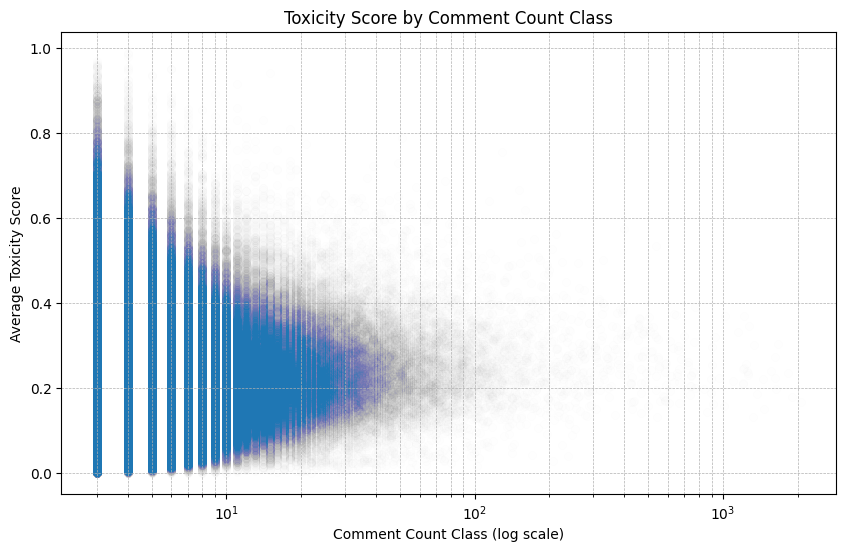

In [93]:
# Leggiamo il csv con pandas

facebook_news=pd.read_csv('/kaggle/working/facebook_news.csv')

# Contiamo il numero di commenti per ogni utente 

comment_counts = facebook_news['user_id'].value_counts().reset_index()

# Filtriamo gli utenti con meno di 2 commenti.

longitudinali=comment_counts[comment_counts['count']>2]['user_id']
long_data=facebook_news[facebook_news['user_id'].isin(longitudinali)]

# Calcoliamo per ogni utente quanti commenti ha fatto e aggiungiamo la colonna comment position con un valore sequenziale.

df=long_data
df['created_at'] = pd.to_datetime(df['created_at'], format='mixed').copy()
df = df.sort_values(by=['user_id', 'created_at'])
df['comment_position'] = df.groupby('user_id').cumcount() + 1

# Confronto tossicità media vs numero di commenti 

user_stats = df.groupby('user_id').agg(
    avg_toxicity_score=('toxicity_score', 'mean'),
    comment_count=('comment_position', 'max')
).reset_index()

# Creazione dello scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(user_stats['comment_count'], user_stats['avg_toxicity_score'], alpha=0.002)
plt.title('Toxicity Score by Comment Count Class')
plt.xlabel('Comment Count Class (log scale)')
plt.ylabel('Average Toxicity Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xscale('log')  # Scala logaritmica per l'asse x
plt.show()
